In [1]:
import os
import shutil

# 指定需要遍历的根目录
root_dir = '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets'
# 指定PDF文件移动到的新目录
new_dir = '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection'

# 如果新目录不存在，则创建它
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

def move_and_rename_pdfs(root_dir, new_dir):
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith('.pdf'):
                # 构造原始PDF文件的完整路径
                original_path = os.path.join(subdir, file)
                # 获取子目录的名称用作新的文件名
                subdir_name = os.path.basename(subdir)
                new_file_name = subdir_name + '.pdf'
                new_file_path = os.path.join(new_dir, new_file_name)
                
                # 检查是否已经存在同名文件
                count = 1
                while os.path.exists(new_file_path):
                    new_file_path = os.path.join(new_dir, f"{subdir_name}_{count}.pdf")
                    count += 1
                
                # 移动并重命名PDF文件
                shutil.move(original_path, new_file_path)
                print(f"Moved and renamed '{original_path}' to '{new_file_path}'")

# 调用函数
move_and_rename_pdfs(root_dir, new_dir)


Moved and renamed '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/135/1649084960Chapter 1.pdf' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection/135.pdf'
Moved and renamed '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/551/20230903 Kho Hua Hae Uniform confidence bands for GRF estimates.pdf' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection/551.pdf'
Moved and renamed '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/556/20240309 Hae ZUO AI and its future.pdf' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection/556.pdf'
Moved and renamed '/Users/ada/Library/Mobile Documents/com~apple~

In [3]:
import os

# 指定目录路径
directory_path = '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection'


def delete_pdf_files(directory):
    # 遍历指定目录
    for filename in os.listdir(directory):
        # 检查文件名是否以“pdf_collection”开头
        if filename.startswith("pdf_collection"):
            file_path = os.path.join(directory, filename)
            # 删除文件
            os.remove(file_path)
            print(f"Deleted: {file_path}")

# 调用函数
delete_pdf_files(directory_path)


Deleted: /Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection/pdf_collection_36.pdf
Deleted: /Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection/pdf_collection_22.pdf
Deleted: /Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection/pdf_collection_23.pdf
Deleted: /Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection/pdf_collection_37.pdf
Deleted: /Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection/pdf_collection_21.pdf
Deleted: /Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection/pdf_collection_35.pdf
Deleted: /Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/

In [8]:
import PyPDF2
import os
from collections import defaultdict

source_dir = '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/pdf_collection'
target_dir = '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection'

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

pdf_groups = defaultdict(list)

for filename in os.listdir(source_dir):
    if filename.lower().endswith('.pdf'):
        prefix = filename.split('_')[0] if '_' in filename else filename.split('.')[0]
        pdf_groups[prefix].append(filename)

for prefix, pdf_files in pdf_groups.items():
    pdf_files.sort()
    txt_filename = f"{prefix}.txt"
    txt_path = os.path.join(target_dir, txt_filename)
    text = ''

    if len(pdf_files) > 1:
        print(f"Merging files for prefix '{prefix}': {pdf_files}")
        merged_pdf_path = os.path.join(source_dir, f"{prefix}_merged.pdf")

        with open(merged_pdf_path, 'wb') as merged_pdf_file:
            pdf_writer = PyPDF2.PdfWriter()
            for pdf_file in pdf_files:
                pdf_path = os.path.join(source_dir, pdf_file)
                try:
                    with open(pdf_path, 'rb') as pdf_reader_file:
                        # 使用 strict=False 来提高容错性
                        pdf_reader = PyPDF2.PdfReader(pdf_reader_file, strict=False)
                        for page in pdf_reader.pages:
                            pdf_writer.add_page(page)
                except Exception as e:
                    print(f"Error processing file {pdf_file}: {e}")
                    continue
            pdf_writer.write(merged_pdf_file)

        # 尝试提取合并后的PDF文本
        try:
            with open(merged_pdf_path, 'rb') as merged_pdf_file:
                pdf_reader = PyPDF2.PdfReader(merged_pdf_file, strict=False)
                for page_num in range(len(pdf_reader.pages)):
                    page_obj = pdf_reader.pages[page_num]
                    text += page_obj.extract_text() or ''
        except Exception as e:
            print(f"Error extracting text from merged PDF {merged_pdf_path}: {e}")
        finally:
            if os.path.exists(merged_pdf_path):
                os.remove(merged_pdf_path)

    else:
        pdf_path = os.path.join(source_dir, pdf_files[0])
        print(f"Processing single file: {pdf_files[0]}")
        try:
            with open(pdf_path, 'rb') as pdf_file:
                pdf_reader = PyPDF2.PdfReader(pdf_file, strict=False)
                for page_num in range(len(pdf_reader.pages)):
                    page_obj = pdf_reader.pages[page_num]
                    text += page_obj.extract_text() or ''
        except Exception as e:
            print(f"Error extracting text from PDF {pdf_path}: {e}")

    with open(txt_path, 'w', encoding='utf-8') as txt_file:
        txt_file.write(text)

    print(f"Extracted text for prefix '{prefix}' to '{txt_path}'")


Processing single file: 202.pdf
Extracted text for prefix '202' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection/202.txt'
Merging files for prefix '88': ['88.pdf', '88_1.pdf']
Extracted text for prefix '88' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection/88.txt'
Merging files for prefix '669': ['669.pdf', '669_1.pdf', '669_2.pdf']
Extracted text for prefix '669' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection/669.txt'
Processing single file: 606.pdf
Extracted text for prefix '606' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection/606.txt'
Processing single file: 174.pdf
Extracted text for prefix '174' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/coursel

Multiple definitions in dictionary at byte 0x16cd for key /AcroForm


Extracted text for prefix '286' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection/286.txt'
Processing single file: 277.pdf
Extracted text for prefix '277' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection/277.txt'
Processing single file: 529.pdf
Extracted text for prefix '529' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection/529.txt'
Processing single file: 717.pdf
Extracted text for prefix '717' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection/717.txt'
Merging files for prefix '106': ['106.pdf', '106_1.pdf', '106_2.pdf']
Extracted text for prefix '106' to '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection/106

In [ ]:
import os
from transformers import pipeline

# 禁用 tokenizers 的并行化
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# 加载预训练的文本摘要模型
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# 指定源文件夹和目标文件夹的路径
source_folder = '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/txt_collection'
target_folder = '/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/abstract_collection'

# 确保目标文件夹存在
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# 遍历源文件夹中的所有TXT文件
for filename in os.listdir(source_folder):
    if filename.endswith('.txt'):
        # 读取源文件的内容
        with open(os.path.join(source_folder, filename), 'r', encoding='utf-8') as file:
            text = file.read()

        # 将文本分成 2048 个字符的段落，并对每段进行摘要
        summaries = []
        for index in range(1, len(text) // 2048 + 2):  # +2 确保包括最后的部分
            text_chunk = text[(index - 1) * 2048:index * 2048]
            if text_chunk.strip():  # 检查是否为空
                try:
                    # 使用模型生成摘要
                    summary = summarizer(text_chunk, max_length=50, min_length=25, do_sample=False)
                    summaries.append(summary[0]['summary_text'])
                except Exception as e:
                    print(f"Error summarizing chunk {index} of '{filename}': {e}")
                    continue

        # 将摘要结果保存到目标文件夹中的对应TXT文件
        with open(os.path.join(target_folder, filename), 'w', encoding='utf-8') as file:
            for summary in summaries:
                file.write(summary + '\n')

        print(f"Processed and summarized '{filename}'")


In [11]:
import os
import csv
from transformers import AutoModel, AutoTokenizer
import numpy as np

model = AutoModel.from_pretrained('mesolitica/llama2-embedding-1b-8k', trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained('mesolitica/llama2-embedding-1b-8k')

def llama_embed(s):
    input_ids = tokenizer(
        [s], 
        return_tensors='pt',
        padding=True
    )
    # 获取模型输出并转为numpy数组
    embedding = model.encode(input_ids).detach().numpy()
    # 将嵌入结果从二维变为一维
    return embedding.flatten()

def process_folder(folder_path, output_file='embeddings.csv'):
    # 准备写出CSV文件，列为: 文件名, 嵌入向量(以空格分隔的字符串)
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['filename', 'embedding'])
        
        for filename in os.listdir(folder_path):
            if filename.endswith('.txt'):
                print(filename)
                file_path = os.path.join(folder_path, filename)
                # 跳过空文件
                if os.path.getsize(file_path) == 0:
                    continue
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as fp:
                    try:
                        content = fp.read()
                        v = llama_embed(content)
                        # 将一维向量转成空格分隔的字符串存储
                        v_str = ' '.join(map(str, v))
                        writer.writerow([filename[:-4], v_str])
                    except Exception as e:

                        continue

# 使用示例：将指定文件夹下的TXT文件处理并输出到embeddings.csv
process_folder('/Users/ada/Library/Mobile Documents/com~apple~CloudDocs/courselets/courselet_components/New Data/courselets/abstract_collection', output_file='embeddings.csv')


276.txt
538.txt
712.txt
699.txt
114.txt
666.txt
100.txt
128.txt
316.txt
464.txt
459.txt
317.txt
129.txt
667.txt
101.txt
698.txt
713.txt
277.txt
288.txt
275.txt
711.txt
705.txt
665.txt
671.txt
117.txt
659.txt
467.txt
315.txt
473.txt
329.txt
328.txt
466.txt
658.txt
670.txt
116.txt
664.txt
704.txt
710.txt
264.txt
714.txt
660.txt
106.txt
112.txt
310.txt
311.txt
113.txt
661.txt
107.txt
715.txt
265.txt
271.txt
298.txt
529.txt
717.txt
139.txt
677.txt
111.txt
663.txt
461.txt
662.txt
676.txt
110.txt
138.txt
716.txt
272.txt
266.txt
299.txt
598.txt
201.txt
215.txt
89.txt
177.txt
375.txt
361.txt
349.txt
360.txt
374.txt
412.txt
638.txt
604.txt
88.txt
176.txt
189.txt
228.txt
214.txt
200.txt
599.txt
202.txt
606.txt
174.txt
376.txt
438.txt
411.txt
377.txt
405.txt
388.txt
175.txt
607.txt
565.txt
571.txt
549.txt
207.txt
603.txt
367.txt
372.txt
170.txt
602.txt
574.txt
589.txt
238.txt
562.txt
600.txt
358.txt
416.txt
370.txt
371.txt
359.txt
601.txt
173.txt
629.txt
198.txt
239.txt
585.txt
591.txt
234.txt
18

In [14]:
import networkx as nx

def construct_pmfg(G):
    """
    根据给定图 G 构建 PMFG (Planar Maximally Filtered Graph)
    假设 G 是完全或接近完全的加权图，边权重存在于 "weight" 属性中。
    """
    # 获取节点数
    n = G.number_of_nodes()
    if n < 3:
        # 对于 n < 3 的图，平面图的最大边数与G无关，小图直接返回G的副本即可
        return G.copy()
    
    # 1. 提取所有边并根据权重从大到小排序
    edges = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
    edges.sort(key=lambda x: x[2], reverse=True)  # 按权重降序
    
    # 2. 初始化空图（仅包含节点）
    pmfg_G = nx.Graph()
    pmfg_G.add_nodes_from(G.nodes(data=True))
    
    # 平面图最大边数
    max_edges = 3 * n - 6
    
    # 3. 依次尝试添加边
    edge_count = 0
    for (u, v, w) in edges:
        # 若已经达到最大边数上限，停止
        if edge_count >= max_edges:
            break

        # 尝试添加边
        pmfg_G.add_edge(u, v, weight=w)
        
        # 检查当前图是否仍平面
        is_planar, embedding = nx.check_planarity(pmfg_G,False)
        if not is_planar:
            # 不平面则撤销添加
            pmfg_G.remove_edge(u, v)
        else:
            # 保持该边
            edge_count += 1
    
    return pmfg_G


Calculating cosine similarity matrix...
Cosine similarity calculation done.
Building graph edges...


Processing edges: 100%|██████████| 41041/41041 [00:00<00:00, 2834674.28it/s]

Graph construction done. Total edges (above threshold): 15432
Constructing PMFG graph...


PMFG construction done.
PMFG graph saved to pmfg_graph.gml
Computing layout for visualization...
Layout computation done.
Drawing PMFG graph...


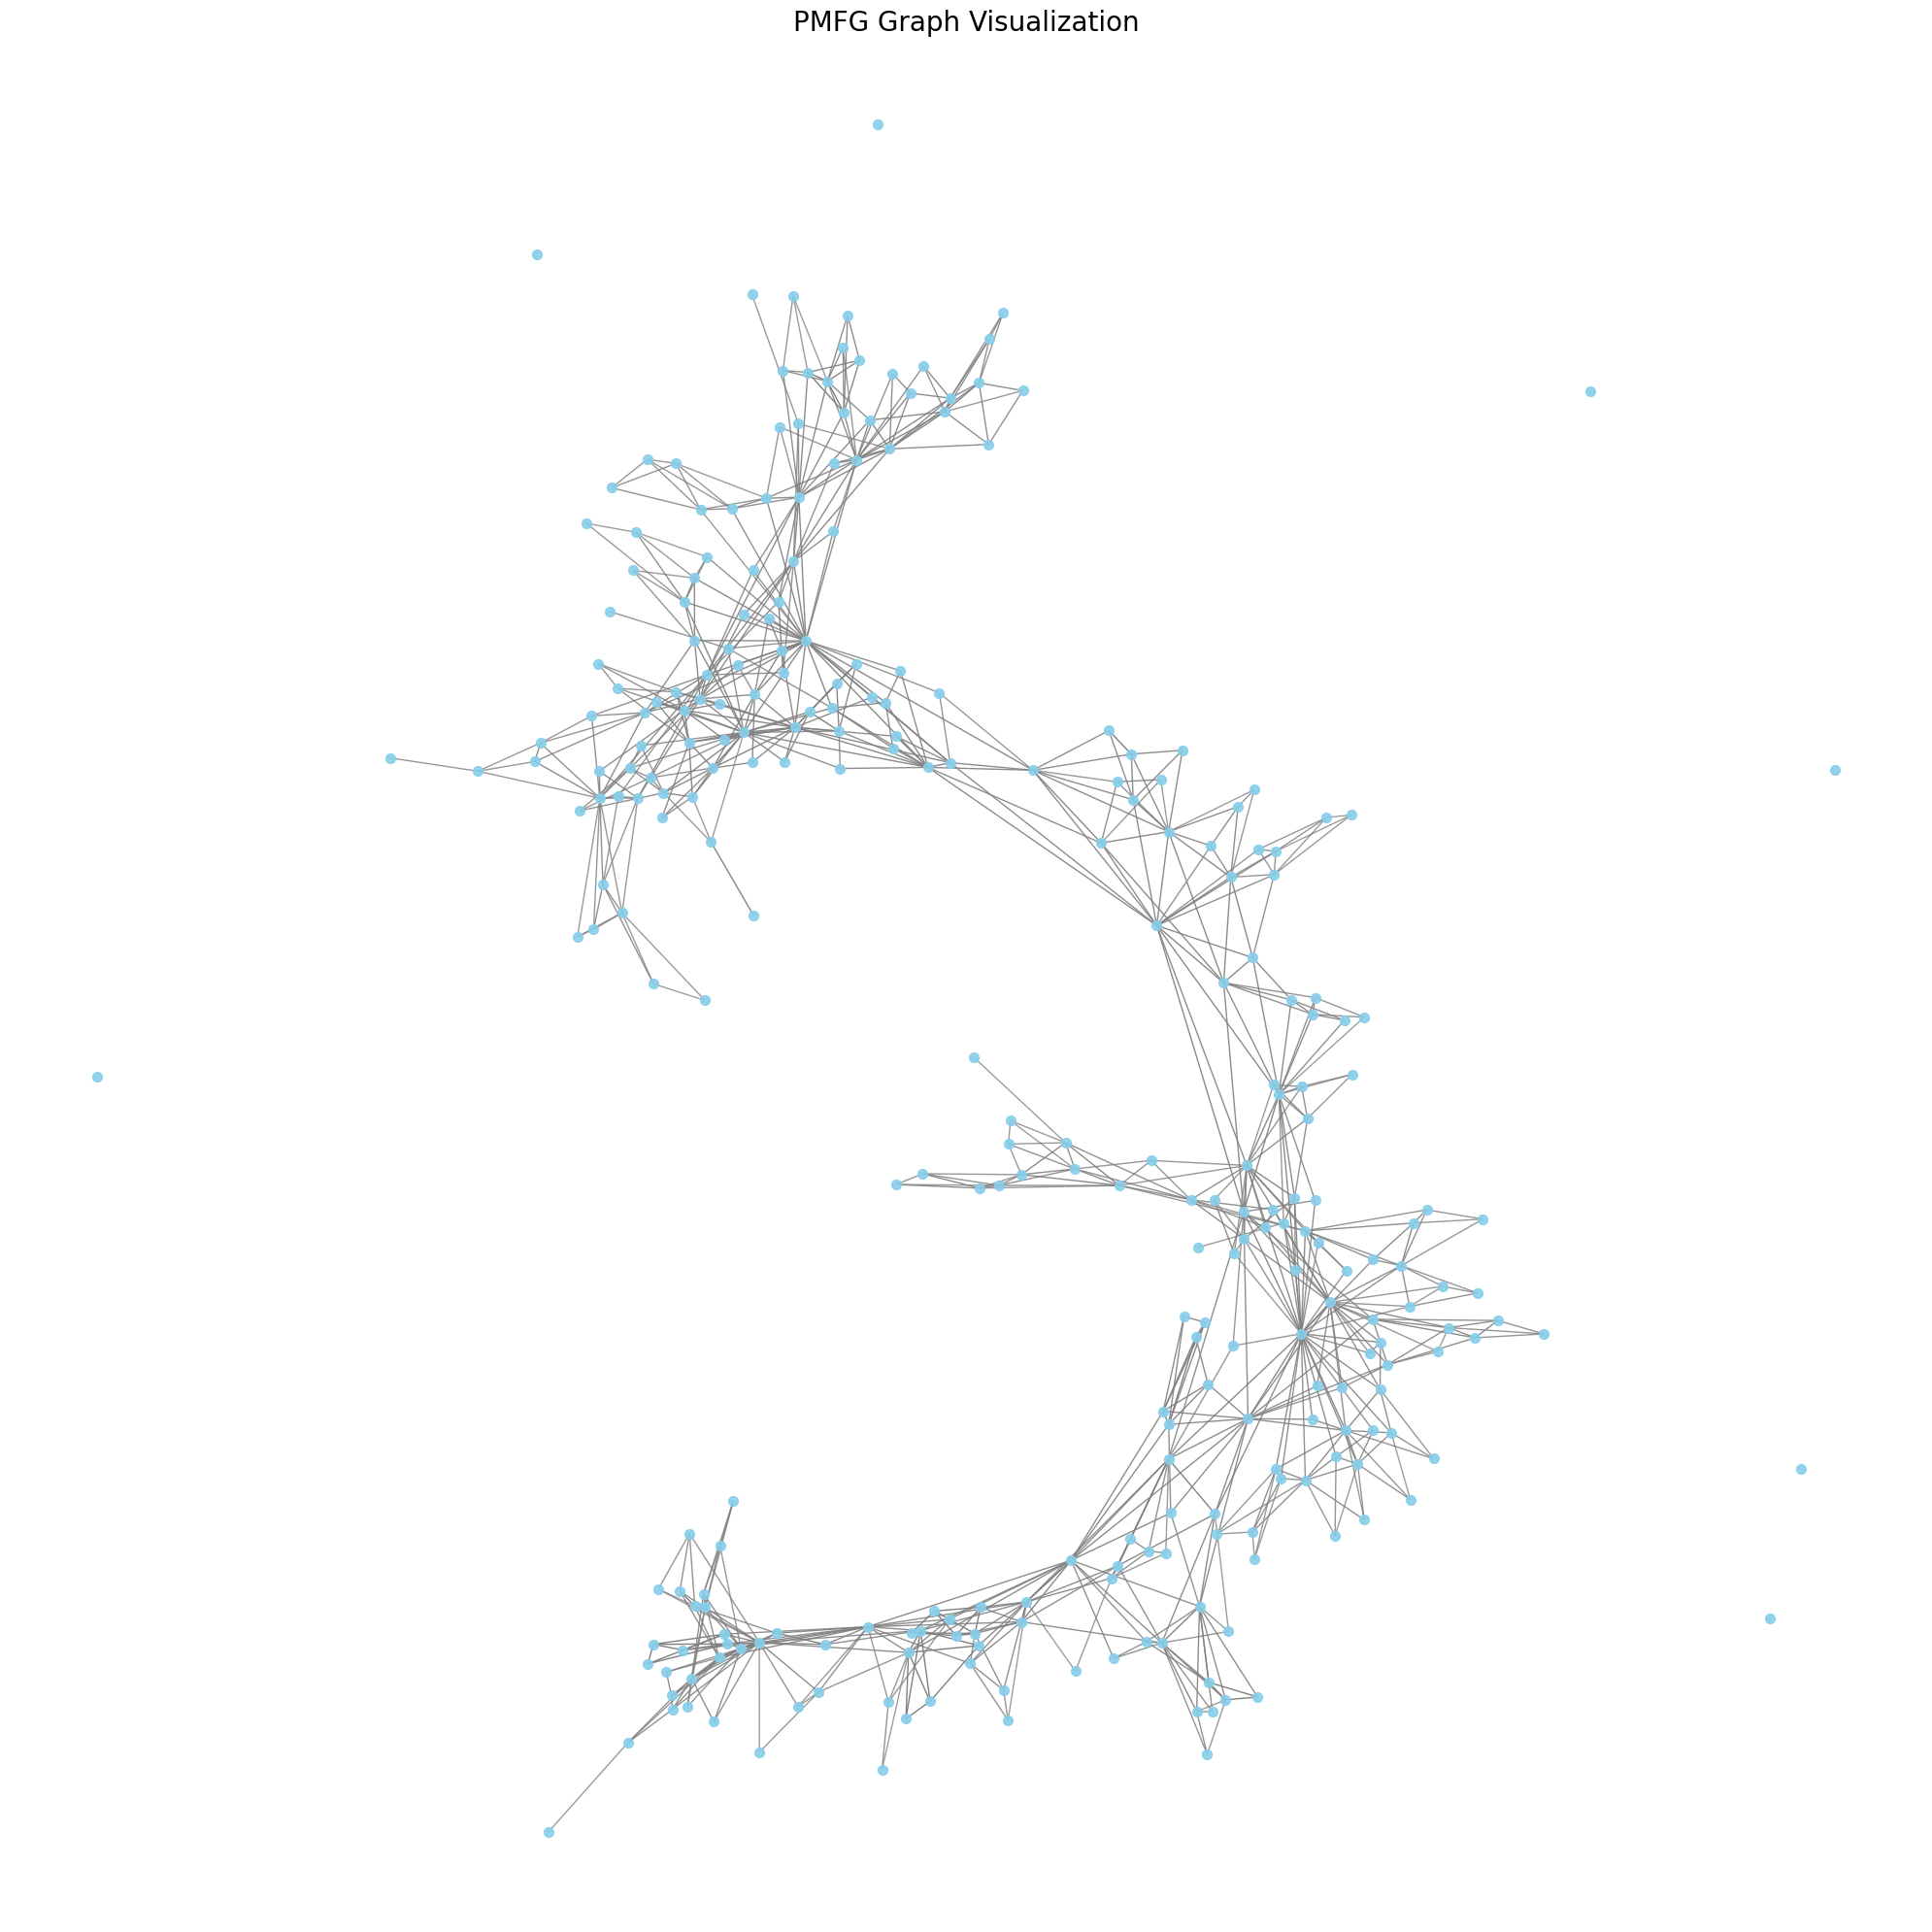

Visualization complete.


In [15]:
import csv
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

# ========== Load Embedding Vectors ==========
csv_file = 'embeddings.csv'
names = []
embeddings = []

with open(csv_file, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        filename = row[0]
        embedding_str = row[1]
        embedding = np.array(list(map(float, embedding_str.split())))
        names.append(filename)
        embeddings.append(embedding)
embeddings = np.vstack(embeddings)

#========== Compute Similarity Matrix ==========
print("Calculating cosine similarity matrix...")
similarity_matrix = cosine_similarity(embeddings)
print("Cosine similarity calculation done.")

# Construct Initial Graph
G = nx.Graph()
num_nodes = len(names)
G.add_nodes_from(range(num_nodes))
threshold = 0.7

print("Building graph edges...")
total_edges = num_nodes * (num_nodes - 1) // 2
with tqdm(total=total_edges, desc="Processing edges") as pbar:
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            sim = similarity_matrix[i, j]
            if sim >= threshold:
                G.add_edge(i, j, weight=sim)
            pbar.update(1)

print(f"Graph construction done. Total edges (above threshold): {G.number_of_edges()}")

print("Constructing PMFG graph...")
pmfg_G = construct_pmfg(G)
print("PMFG construction done.")

#========== Save PMFG Graph to File ==========
#Using GML format as an example
output_file = "pmfg_graph.gml"
nx.write_gml(pmfg_G, output_file)
print(f"PMFG graph saved to {output_file}")

#========== Visualization (Optional) ==========
print("Computing layout for visualization...")
pos = nx.spring_layout(pmfg_G, k=0.1, iterations=50)
print("Layout computation done.")

plt.figure(figsize=(20, 20))
edges = pmfg_G.edges(data=True)
edge_widths = [d['weight'] for (u,v,d) in edges]
max_weight = max(edge_widths) if edge_widths else 1.0
edge_alphas = [0.2 + 0.8*(w/max_weight) for w in edge_widths]

print("Drawing PMFG graph...")
nx.draw_networkx_nodes(pmfg_G, pos, node_size=50, node_color='skyblue', alpha=0.9)
for (u, v, d), alpha in zip(edges, edge_alphas):
    nx.draw_networkx_edges(pmfg_G, pos, edgelist=[(u, v)], width=1.0, alpha=alpha, edge_color='gray')
# nx.draw_networkx_labels(pmfg_G, pos, labels={i:names[i] for i in range(num_nodes)}, font_size=8)

plt.axis('off')
plt.title("PMFG Graph Visualization", fontsize=20)
plt.tight_layout()
plt.show()
print("Visualization complete.")
